In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import scipy as sp
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-dark")
sns.set_palette("bright")

mpl.rc('axes', labelsize=14, titlesize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd
data = pd.read_csv("/home/claym0re/Projects/python3/machine-learning/ml-algorithms/datasets/house-prices/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
X = data[["SalePrice", "LotArea", "GrLivArea"]].to_numpy().reshape(-1,3)
y = np.where(data["YearBuilt"]>=1980, 1, 0).reshape(-1,)

X_train, X_test, y_train, y_test = X[:1024], X[1025:], y[:1024], y[1025:]

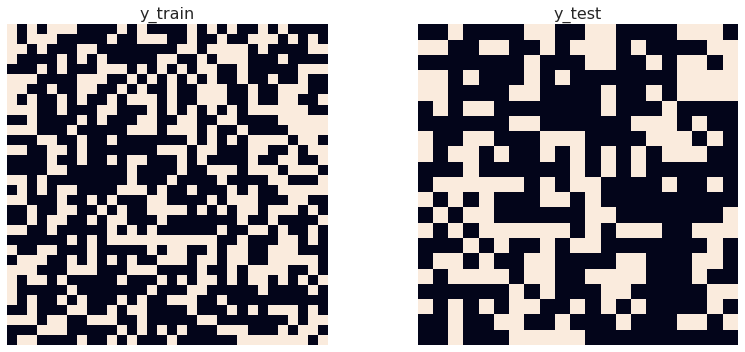

In [6]:
def plot_labels(y, ax=None):
    square_shape = int(np.ceil(np.sqrt(y.shape[0])))
    ys = y.copy()
    ys.resize(square_shape, square_shape)
    sns.heatmap(ys, square=True, cbar=False, xticklabels=False, yticklabels=False, ax=ax)

fig = plt.figure(figsize= (12,5))
ax1 = plt.subplot(121, title="y_train")
plot_labels(y_train, ax1)
ax2 = plt.subplot(122, title="y_test")
plot_labels(y_test, ax2)
plt.tight_layout()

In [8]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=3, p=2, **kwargs):
        self.K = n_neighbors
        self.p = p
    def fit(self, X, y):
        self.Neighbors = X
        self.y = y
        
    def distance(self, X):
        Xs = np.sum(X ** self.p, axis=1, keepdims=True)
        NNs = np.sum(self.Neighbors ** self.p, axis=1, keepdims=True)
        XNN = np.dot(Xs, NNs.T)

        return  np.power(abs(Xs - NNs.T), 1/self.p)
    
    def predict(self,X):
        y_pred = []
        for d in self.distance(X):
            k_indices = np.argsort(d)[:self.K]
            k_labels = self.y[k_indices]
            y_pred.append(np.argmax(np.bincount(k_labels)))
        return np.array(y_pred)

In [9]:
knn = KNearestNeighbors(n_neighbors=12)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([257, 178]))

In [11]:
def accuracy_score(y_pred, y):
        return sum(y_pred == y)/y.shape[0]

print("Accuracy Score for Scratch KNN: ", accuracy_score(y_pred, y_test))

Accuracy Score for Scratch KNN:  0.8045977011494253


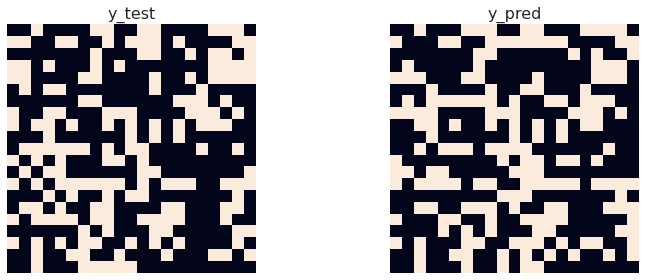

In [12]:
fig = plt.figure(figsize= (12,4))
ax1 = plt.subplot(121, title="y_test")
plot_labels(y_test, ax1)
ax2 = plt.subplot(122, title="y_pred")
plot_labels(y_pred, ax2)
plt.tight_layout()

In [13]:
def get_scores(classifier, rang, X_train, X_test, y_train, y_test, p=2):
    scores = []
    for k in rang:
        KNN = classifier(n_neighbors=k, p=p, algorithm='brute', metric='euclidean')
        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)
        score = accuracy_score(y_pred, y_test)
        scores.append(score)
    
    return scores

In [14]:
k = np.arange(1,59)
scores = get_scores(KNearestNeighbors, k, X_train, X_test, y_train, y_test)

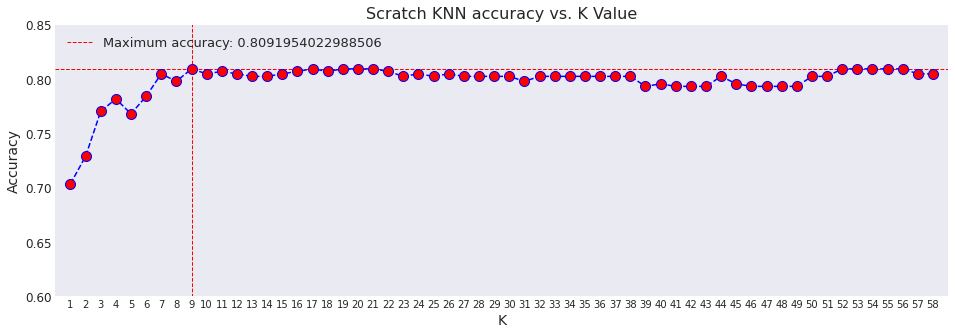

In [15]:
plt.figure(figsize=(16,5))
plt.plot(k, scores, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xticks([n for n in k])
plt.tick_params('x', labelsize=10)
plt.hlines(max(scores),0, 400, color="red", lw=1, ls="--", label=f"Maximum accuracy: {max(scores)}")
plt.vlines(scores.index(max(scores))+1,0, 400, color="red", lw=1, ls="--")
plt.title('Scratch KNN accuracy vs. K Value')
plt.axis([0, 59, 0.6, 0.85])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper left", fontsize=13)
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn = KNeighborsClassifier(n_neighbors=13, p=2, algorithm='brute')
sk_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=13)

In [17]:
sk_pred = sk_knn.predict(X_test)
accuracy_score(sk_pred, y_test)

0.8068965517241379

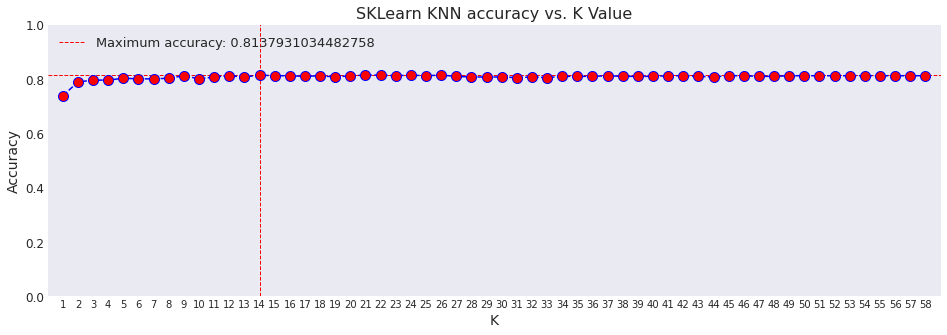

In [18]:
sk_scores = get_scores(KNeighborsClassifier, k, X_train, X_test, y_train, y_test)

plt.figure(figsize=(16,5))
plt.plot(k, sk_scores, color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xticks([n for n in k])
plt.tick_params('x', labelsize=10)
plt.hlines(max(sk_scores),0, 400, color="red", lw=1, ls="--", label=f"Maximum accuracy: {max(sk_scores)}")
plt.vlines(sk_scores.index(max(sk_scores))+1,0, 400, color="red", lw=1, ls="--")
plt.title('SKLearn KNN accuracy vs. K Value')
plt.axis([0, 59, 0, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend(loc="upper left", fontsize=13)
plt.show()

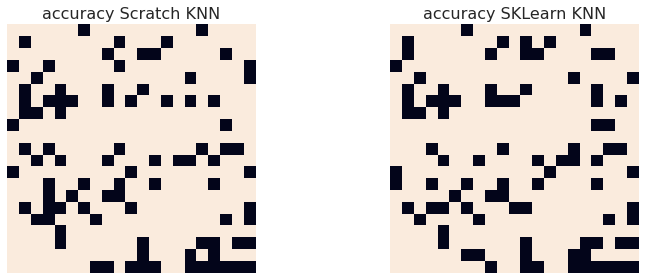

In [19]:
fig = plt.figure(figsize= (12,4))
ax1 = plt.subplot(121, title="accuracy Scratch KNN")
plot_labels(np.array(y_test.flatten()==y_pred), ax1)
ax2 = plt.subplot(122, title="accuracy SKLearn KNN")
plot_labels(np.array(y_test.flatten()==sk_pred), ax2)
plt.tight_layout()  
##Black squares = wrong